In [96]:
import numpy as np
import pandas as pd
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import matplotlib.pyplot as plt 
import pandas_datareader.data as web
from pandas import DataFrame

In [137]:
#Observed from the data file
S0 = 2707.88
t0 = '02-08-2019'
expiry = '12-20-2019'
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.strptime(t0, "%m-%d-%Y")).days / 365


In [98]:
import pandas as pd

df = pd.read_table('quotedata.dat',
                  skiprows=2,
                  sep=',',
                  header=0)

In [99]:
df

,Expiration Date,Calls,CBid,CAsk,Strike,Puts,PBid,PAsk
0,12/20/2019,SPX191220C01750000,955.0,958.7,1750.0,SPX191220P01750000,8.9,9.5
1,12/20/2019,SPX191220C01775000,931.4,935.1,1775.0,SPX191220P01775000,9.7,10.3
2,12/20/2019,SPX191220C01800000,907.9,911.5,1800.0,SPX191220P01800000,10.6,11.2
3,12/20/2019,SPX191220C01825000,884.5,888.1,1825.0,SPX191220P01825000,11.5,12.2
4,12/20/2019,SPX191220C01850000,861.1,864.7,1850.0,SPX191220P01850000,12.5,13.2
...,...,...,...,...,...,...,...,...
61,12/20/2019,SPX191220C03275000,5.7,6.2,3275.0,SPX191220P03275000,546.3,550.0
62,12/20/2019,SPX191220C03300000,5.1,5.5,3300.0,SPX191220P03300000,570.0,573.7
63,12/20/2019,SPX191220C03350000,3.9,4.3,3350.0,SPX191220P03350000,617.6,621.4
64,12/20/2019,SPX191220C03400000,3.0,3.5,3400.0,SPX191220P03400000,665.7,669.4


In [100]:
r = 0.027
df["PMid"] = df[['PBid', 'PAsk']].mean(axis=1)
df["CMid"] = df[['CBid', 'CAsk']].mean(axis=1)
df["F"] = df["CMid"]-df["PMid"]+df["Strike"]
#q = 0.009

df["q"] = np.log((df["CMid"]-df["PMid"]+df["Strike"]*exp(-r*t))/S0)/-t
#df["r0"] = (-np.log(S0+df["PMid"]-df["CMid"])/df["Strike"])/t
#df["r1"] = (-np.log(S0+df["PMid"]-df["CMid"])/df["Strike"]+51.7)/t

q = 0.0218
# initiate initial auess for sigma
df["Csigma_i"] = sqrt(2*pi/t)*df["CMid"]/S0
df["Psigma_i"] = 1/(sqrt(2*pi/t)*df["PMid"]/S0)
df["ln(K/S)"] = np.log(df["Strike"]/S0)

df["d1"] = (np.log(S0 / df["Strike"]) + (r + 0.5 * df["Csigma_i"] ** 2) * t) / (df["Csigma_i"] * np.sqrt(t))
    
df["vega"] = 1 / np.sqrt(2 * np.pi) * S0 * np.exp(-q * t) * np.exp(-(df["d1"] ** 2) * 0.5) * np.sqrt(t)

F = S0*exp(r-q)*t

C = df["CMid"]
P = df["PMid"]

K = df["Strike"]

df["Csq"] = (sqrt(2*pi/t)*df["CMid"]/S0)*(sqrt(2*pi/t)*df["CMid"]/S0)

5.199999999999989

In [22]:
#R = r(S0,df["PMid"],df["CMid"],df["Strike"],t)

In [23]:
#Define the SVI function
def SVI(x, a, b,p,m,s):
    return a+b*(p*(x-m)+sqrt((x-m)**2+s**2))

In [24]:
df

,Expiration Date,Calls,CBid,CAsk,Strike,Puts,PBid,PAsk,PMid,CMid,...,Csq,CVol,PVol,MidVol,OTMCs,OTMPs,OTMVol,OTMWVol,OTMWCs,OTMWPs
0,12/20/2019,SPX191220C01750000,955.0,958.7,1750.0,SPX191220P01750000,8.9,9.5,9.20,956.85,...,0.909057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.455854,NaN
1,12/20/2019,SPX191220C01775000,931.4,935.1,1775.0,SPX191220P01775000,9.7,10.3,10.00,933.25,...,0.864767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.455854,NaN
2,12/20/2019,SPX191220C01800000,907.9,911.5,1800.0,SPX191220P01800000,10.6,11.2,10.90,909.70,...,0.821674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.455854,NaN
3,12/20/2019,SPX191220C01825000,884.5,888.1,1825.0,SPX191220P01825000,11.5,12.2,11.85,886.30,...,0.779947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.455854,NaN
4,12/20/2019,SPX191220C01850000,861.1,864.7,1850.0,SPX191220P01850000,12.5,13.2,12.85,862.90,...,0.739306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.455854,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,12/20/2019,SPX191220C03275000,5.7,6.2,3275.0,SPX191220P03275000,546.3,550.0,548.15,5.95,...,0.000035,4.455799,9.382936e-10,2.227900,4.455799,NaN,4.455799,4.455854,4.455854,NaN
62,12/20/2019,SPX191220C03300000,5.1,5.5,3300.0,SPX191220P03300000,570.0,573.7,571.85,5.30,...,0.000028,4.455787,9.382936e-10,2.227893,4.455787,NaN,4.455787,4.455854,4.455854,NaN
63,12/20/2019,SPX191220C03350000,3.9,4.3,3350.0,SPX191220P03350000,617.6,621.4,619.50,4.10,...,0.000017,4.455762,9.382936e-10,2.227881,4.455762,NaN,4.455762,4.455854,4.455854,NaN
64,12/20/2019,SPX191220C03400000,3.0,3.5,3400.0,SPX191220P03400000,665.7,669.4,667.55,3.25,...,0.000010,4.455738,9.382936e-10,2.227869,4.455738,NaN,4.455738,4.455854,4.455854,NaN


In [25]:
import numpy as np
import scipy.stats as si

def newton_vol_call_div(S, T, C, K, r, q, sigma):

        
        d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
        fx = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) - C
    
        vega = (1 / np.sqrt(2 * np.pi)) * S * np.exp(-q * T) * np.sqrt(T) * np.exp((-si.norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
        tolerance = 0.000001
        x0 = sigma
        xnew  = x0
        xold = x0 - 1
        while abs(xnew - xold) > tolerance:
            xold = xnew
            xnew = (xnew - fx - C) / vega
        
        return abs(xnew) 

In [26]:
#Works

import numpy as np
import scipy.stats as si

def newton_vol_call(S, T, C, K, r, q, sigma):
    output = np.zeros(len(C))
    for num, (c, k) in enumerate(zip(C, K)):

        
        d1 = (np.log(S / k) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / k) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
        fx = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - k * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) - c
    
        vega = (1 / np.sqrt(2 * np.pi)) * S * np.exp(-q * T) * np.sqrt(T) * np.exp((-si.norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
        tolerance = 0.000001
        x0 = sigma
        xnew  = x0
        xold = x0 - 1
        while abs(xnew - xold) > tolerance:
            xold = xnew
            xnew = (xnew - fx - c) / vega
            
            output[num] = abs(xnew)
        
    return output
    

In [27]:
#Works
def newton_vol_put(S, K, T, P, r, q, sigma):
    output = np.zeros(len(P))
    for num, (p, k) in enumerate(zip(P, K)):
        
        d1 = (np.log(S / k) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S / k) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
        fx = k * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) -  p
    
        vega = (1 / np.sqrt(2 * np.pi)) * S * np.exp(-q * T) * np.sqrt(T) * np.exp((-si.norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
        tolerance = 0.000001
        x0 = sigma
        xnew  = x0
        xold = x0 - 1
        
        while abs(xnew - xold) > tolerance:
            xold = xnew
            xnew = (xnew - fx - p) / vega
        
            output[num] = abs(xnew)
        
    return output

In [28]:
df["CVol"] = newton_vol_call(S0, t, C, K, r, q, 0.2)
df["PVol"] = newton_vol_put(S0, K, t, P, r, q, 0.2)

In [30]:
df["CVol"] = newton_vol_call(S0, t, C, K, r, q, 0.2)
df["PVol"] = newton_vol_put(S0, K, t, P, r, q, 0.2)
df["MidVol"] = df[['CVol', 'PVol']].mean(axis=1)
df["OTMCs"] = df["CVol"][39:]
df["OTMPs"] = df["PVol"][:38]
df["OTMVol"] = pd.concat([df["PVol"][:38], df["CVol"][39:]])
df["OTMWVol"] = np.average(df["PVol"][:38], weights=np.linspace(38, 1, num=38))

In [31]:
df["OTMCs"][:38].shape

(38,)

In [32]:
df["OTMWVol"] = np.average(df["CVol"][39:], weights=np.linspace(1, 27, num=27))

In [33]:
df["OTMWCs"] = np.average(df["CVol"][39:], weights=np.linspace(1, 27, num=27))
df["OTMWPs"] = np.average(df["PVol"][:38], weights=np.linspace(38, 1, num=38))
df["OTMWVol"]= pd.concat([df["OTMWPs"][:38], df["OTMWCs"][39:]])

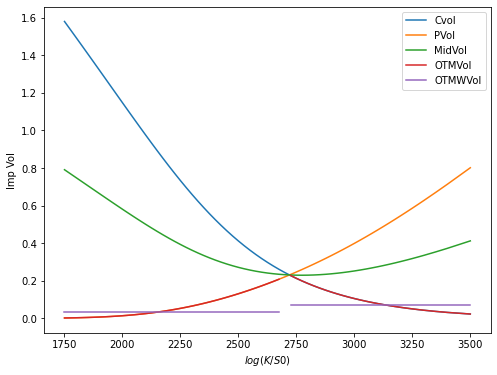

In [41]:
CVol = df["CVol"]
PVol = df["PVol"]
MidVol = df["MidVol"]
OTMVol = df["OTMVol"] 
OTMWVol = df["OTMWVol"]
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(K, CVol, K, PVol, K, MidVol, K, OTMVol, K, OTMWVol)
plt.xlabel('$log (K/S0)$')
plt.ylabel('Imp Vol')
plt.legend(['Cvol', 'PVol', 'MidVol', 'OTMVol', 'OTMWVol'])
plt.show()

In [51]:
#xdata=np.array(df["ln(K/S)"])
moneyness = df["ln(K/S)"]
t = moneyness
#Choices for Y: Equally Weighted Mid:MidVol , OTM:OTMVol, WOTM:OTMWVol 
#Lets try Mid
y = MidVol**2

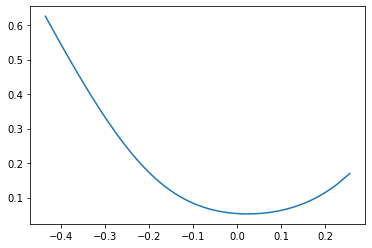

In [52]:
plt.plot(t, y) 
plt.show()

In [53]:
def model(t, coeffs):
    return coeffs[0] + coeffs[1] * (coeffs[2]*(t-coeffs[3]) + np.sqrt((t-coeffs[3])**2 + (coeffs[4])**2 ))

In [54]:
x0 = np.array([0.5, 0.5, 0.5, 0.5, 0.5], dtype=float)

In [55]:
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

In [56]:
from scipy.optimize import leastsq
x, flag = leastsq(residuals, x0, args=(y, t))

In [57]:
print(x)

[-1.18848167  2.92769881 -0.4258364  -0.20311498  0.46727731]


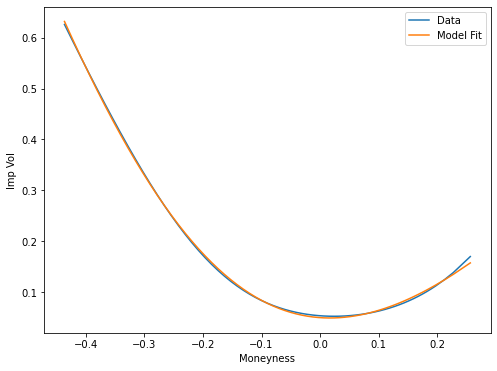

In [58]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t, y, t, model(t, x))
plt.xlabel('Moneyness')
plt.ylabel('Imp Vol')
plt.legend(['Data', 'Model Fit'])
plt.show()

In [83]:
MSE = np.square(np.subtract(y,model(t, x))).mean()
MSE

9.82068529434802e-06

In [87]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,model(t, x))

9.82068529434802e-06

In [85]:
MAD = np.abs(np.subtract(y,model(t, x))).mean()
MAD

0.0026194784135025323

In [72]:
# Lets Fit this back to our model to price a ATM Option:
def SVI(x, a, b,p,m,s):
    return a+b*(p*(x-m)+sqrt((x-m)**2+s**2))

In [106]:
#If prices are quoted in terms of Vol
var = SVI(1, x[0], x[1], x[2], x[3], x[4])
vol = np.sqrt(var)
var
vol

1.0441591277559947

In [120]:
def sviCurve (parameters, moneyness):
    a = parameters[0]
    b = parameters[1]
    rho = parameters[2]
    m = parameters[3]
    sigma = parameters[4]
    return [a+b*(rho*(k-m)+np.sqrt((k-m)**2 + sigma**2)) for k in moneyness]


In [103]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

In [104]:
def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [138]:
#If prices are quoted in BS
bs_call(S0,S0,0.863,r,0.05)

86.89064944782263

In [63]:
def sviCurve (parameters, moneyness):
    a = parameters[0]
    b = parameters[1]
    rho = parameters[2]
    m = parameters[3]
    sigma = parameters[4]
    return [a+b*(rho*(k-m)+np.sqrt((k-m)**2 + sigma**2)) for k in moneyness]

moneyness =np.array(df["ln(K/S)"])

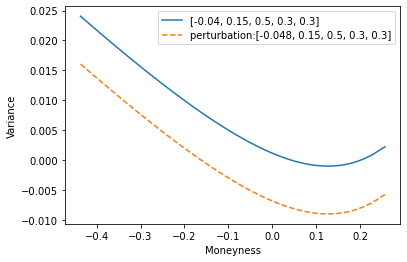

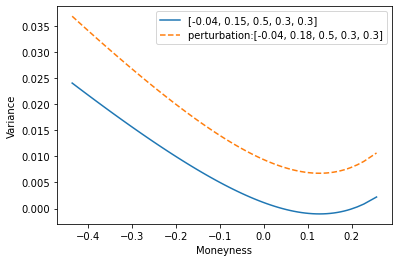

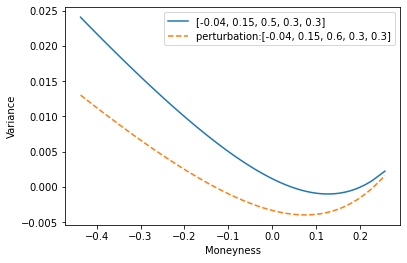

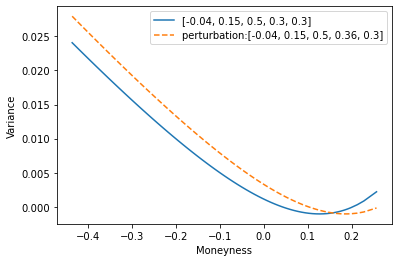

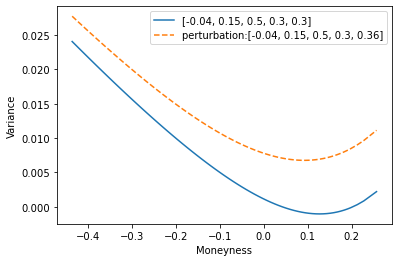

In [25]:
xdata = moneyness
parameters = [-0.04, 0.15, 0.5, 0.3, 0.3]

y = sviCurve(parameters,xdata)
ydata = y
plt.plot(xdata, ydata, 'b-', label='data')

In [146]:
#VIX Paper
min(abs(df["CMid"]-df["PMid"]))

5.199999999999989

In [ ]:
#Pricing Variance Swap as per GS paper
#1. Define your OTM option set such that 
#2. Use SVI to get their imp vol
#3. Determine their Weight
#4. Value per option
#5. contribution



In [ ]:
def sviCurve (parameters, moneyness):
    a = parameters[0]
    b = parameters[1]
    rho = parameters[2]
    m = parameters[3]
    sigma = parameters[4]
    return [a+b*(rho*(k-m)+np.sqrt((k-m)**2 + sigma**2)) for k in moneyness]

In [118]:
Pstrikes = K[:39]
Cstrikes = K[40:]
Striks = pd.concat([K[:39],K[40:]])
M = np.log(Striks/S0)
vols = sviCurve (x, M)
PutP = df["PMid"][:39]
CallP = df["CMid"][40:]
dP = 

#df["PMid"] = df[['PBid', 'PAsk']].mean(axis=1)
#df["CMid"] = df[['CBid', 'CAsk']].mean(axis=1)
#df["F"] = df["CMid"]-df["PMid"]+df["Strike"]

In [119]:
vols[39]

0.04933205707812505